Credit:
- https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
from sklearn.mixture import GaussianMixture

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root = '/content/drive/MyDrive/SSDD/JPEGImages_sub/'
img = cv.imread(root + '/07_4_23.jpg',0)
fil = img[img!=0]
fil = cv.equalizeHist(fil)

In [ ]:
X = fil.reshape(len(fil), 1)
gmm = GaussianMixture(n_components=1, random_state = 0, max_iter=200).fit(X)
one_mean = gmm.means_[0][0]
bic1 = gmm.bic(X)
print(bic1)
gmm = GaussianMixture(n_components=2, random_state = 0, max_iter=200).fit(X)
two_mean_0 = gmm.means_[0][0]
two_mean_1 = gmm.means_[1][0]
bic2 = gmm.bic(X)
bic2

7316058.328451459


7221155.988398942

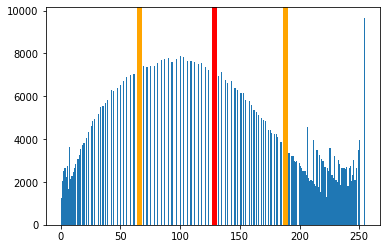

Line seperation is 122.73662896686363


In [ ]:
plt.axvline(x =one_mean, color = 'red', lw = 5)
plt.axvline(x =two_mean_0, color = 'orange', lw = 5)
plt.axvline(x =two_mean_1, color = 'orange', lw = 5)
plt.hist(fil,256)
plt.show()
print(f'Line seperation is {two_mean_1 - two_mean_0}')

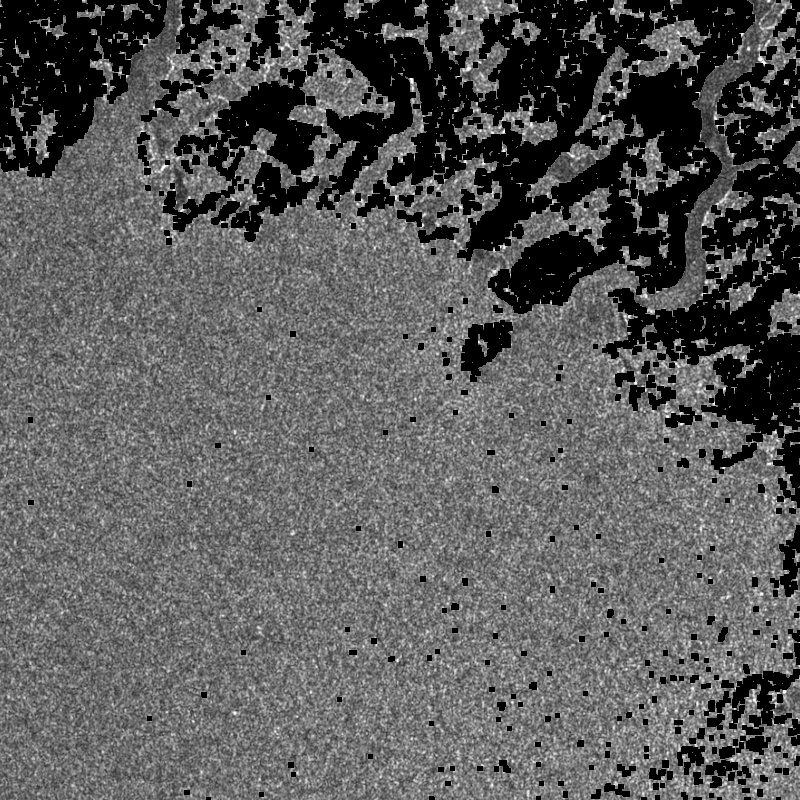

In [ ]:
mask = np.zeros_like(img).astype('uint8')
if two_mean_1 - two_mean_0 > 0:
  pred = np.where(gmm.predict(X), 0, 1)
else:
  pred = np.where(gmm.predict(X), 1, 0)
mask[np.where(img!=0)] = pred
kernel = np.ones((5,5),np.uint8)
morph = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel) 
cv2_imshow(morph * img)

In [4]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

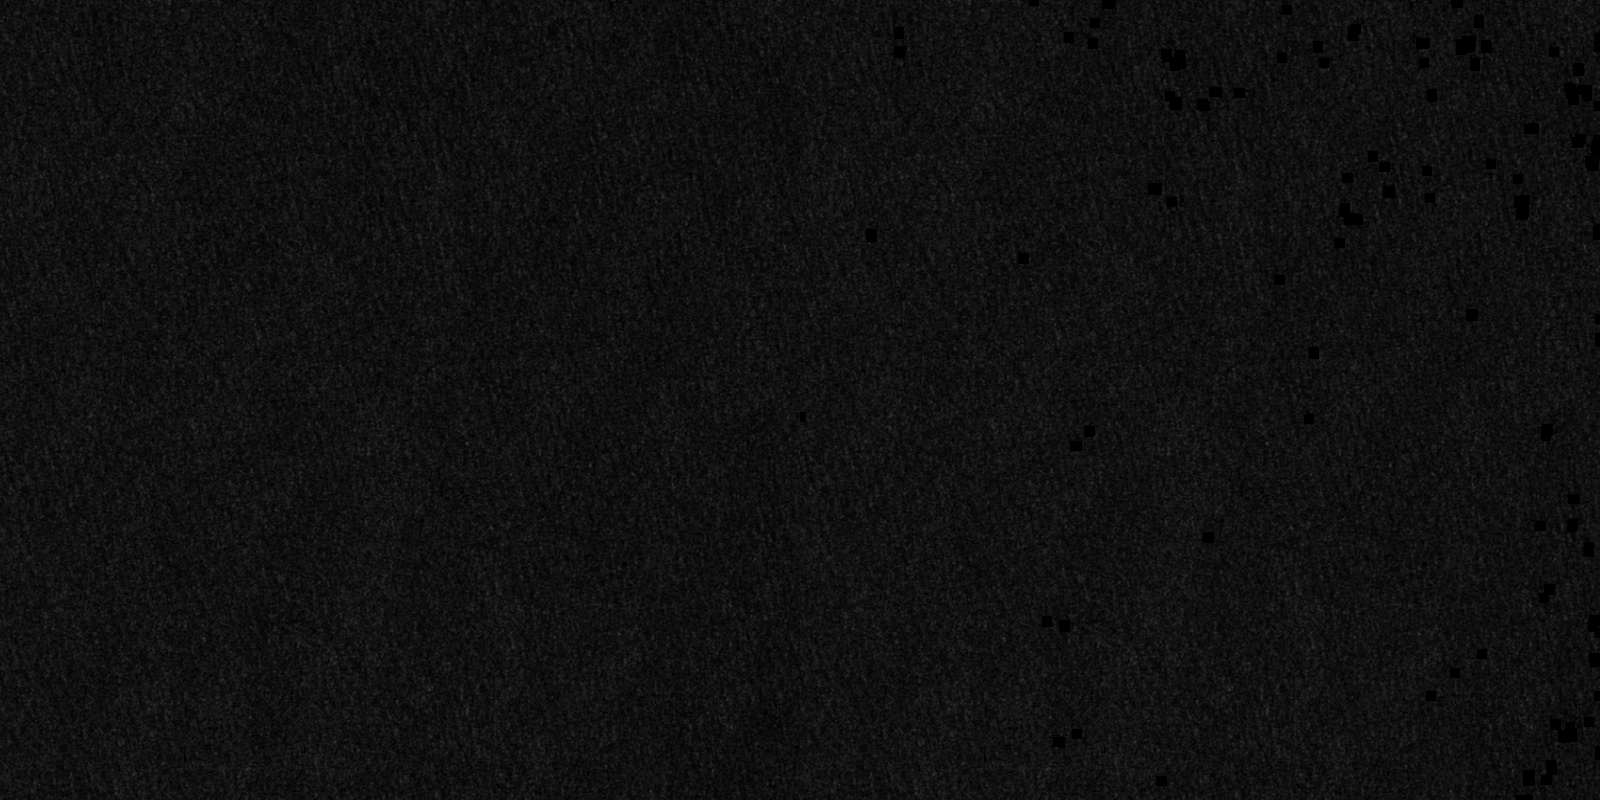

In [5]:
root = '/content/drive/MyDrive/SSDD/JPEGImages_sub/'
img = cv.imread(root + '/01_1_3.jpg',0)
img = crop_image(img, tol=0)
FILTER = 10
BLUR = 5
res = cv.equalizeHist(img)
blur = cv.GaussianBlur(img,(BLUR,BLUR),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = np.where(th3 == 255, 1, 0).astype('uint8')
kernel = np.ones((FILTER,FILTER),np.uint8)
morph = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
cv2_imshow(cv.hconcat([img, morph * img]))